<a href="https://colab.research.google.com/github/MELAI-1/MY-PROJECT/blob/main/machine-learning/Melvin_ml_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to ML

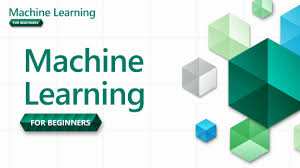

<a id="contents"></a>
# <p style="background-color: #265576; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Table Of Contents</p>

- <a href="#setup">A. setup</a>
  - <a href="#mount">a.1. Mount the google drive in colab </a>
  - <a href="#libraries">a.2. Installing Required Libraries</a>
  
- <a href="#tutorial1">I. Tutorial 1:Linear Regressor</a>  
  - <a href="#intro1">Introduction</a>

  - <a href="#part1">Part I: Linear Regressor By Hand </a>
    - <a href="#data1">1.1. Get the data </a>
    - <a href="#plot1">1.2 Plot the data</a>
    - <a href="#functions1">1.3 Functions</a>
    - <a href="#linearloop1">1.4 Linear Regressor Loop</a>
    - <a href="#gradient1">1.5 Visualize the gradient descent</a>
    - <a href="#tutorial1">1.6  Let’s check with NumPy</a>
  - <a href="#part2">Part II: Generalizing to n features with vectorized gradient descent </a>
    - <a href="#general  "> Linear regressor for a  a parameter vector</a>
  - <a href="#part3">Part III: Let’s get classy with OOP</a>
    - <a href="#class">class LinearRegressor </a>



<a id="setup"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **A-Setup**</p>

<a id="mount"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.1. Mount the Google Drive in colab</p>

Mounting  Google Drive to Colab  allows us to access and save files directly from our Drive, making it easier to work with our data and projects.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<a id="libraries"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">a.2. Installing Required Libraries</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


For this turorial, we will be using the following libraries:
 - [`pandas`] for managing the data.
 - [`numpy`] for mathematical operations.
 - [`seaborn`] for visualizing the data.
 - [`matplotlib`] for visualizing the data.
 - ['os'] for management system



<a id="tutorial1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> **I-Tutorial 1: Linear Regressor**</p>

<a id="intro1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px"> Introduction</p>

**A learning regressor** is a type of machine learning algorithm used for regression tasks, which aim to predict a continuous numerical output based on input features.
 Common Types:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Support Vector Regression (SVR)
- Gradient Boosting Regressor
- Neural Network Regressor



<a id="part1"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part I: Linear Regressor By Hand</p>

<a id="data1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.1. Get the data</p>

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/intro_ML_data/ml_tutorial_1.csv')
df.head()

,x,y
0,5.488135,29.654508
1,7.151894,34.993590
2,6.027634,35.994273
3,5.448832,24.815775
4,4.236548,21.034960


<a id="plot1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.2 Plot the data</p>

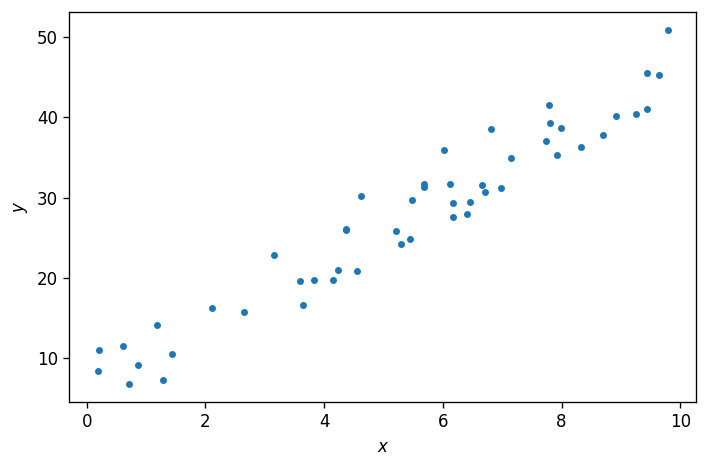

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.scatter(df['x'], df['y'], s=10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.tight_layout()

<a id="function1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.3 Functions</p>

a-Hypothesis function

In [ ]:
# Single feature linear hypothesis
def h_linear_single_feature(thetas, x):
    """
    Simple linear model for a single feature.

    Parameters
    ----------
    thetas : array-like
        [theta_0, theta_1] where theta_0 is the intercept and theta_1 is the slope.
    x : array-like
        Input feature, shape (m_samples,).

    Returns
    -------
    predictions : array
        Predicted values, shape (m_samples,).
    """
    return thetas[0] + thetas[1] * x

b-Cost function

In this case our cost function is :  **Mean Squared Error (MSE)**

The formula  is:

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

In this formula:

* $n$ is the number of data points.
* $y_i$ is the real value of the $i^{th}$ data point.
* $\hat{y_i}$ is the predicted value of the $i^{th}$ data point.

In [ ]:
# Cost function for single feature linear model
def cost_function(thetas, x, y):
    """
    Calculates the mean squared error cost for a single feature linear model.

    Parameters
    ----------
    thetas : array-like
        [theta_0, theta_1] where theta_0 is the intercept and theta_1 is the slope.
    x : array-like
        Input feature, shape (m_samples,).
    y : array-like
        True values, shape (m_samples,).

    Returns
    -------
    cost : float
        Mean squared error cost.
    """
    m = len(y)
    predictions = h_linear_single_feature(thetas, x)
    sq_errors = (predictions - y) ** 2
    return (1 / (2 * m)) * np.sum(sq_errors)

In [ ]:
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])

# Set intercept term to zero
theta_0 = 0

# List of values for theta_1 (the slope)
theta_1_candidates = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]

for theta_1 in theta_1_candidates:
    thetas = [theta_0, theta_1]
    cost = cost_function(thetas, x_test, y_test)
    print(f'Cost for theta_1 = {theta_1}: {cost}')

In [ ]:
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])

# Set intercept term to zero
theta_0 = 0

# List of values for theta_1 (the slope)
theta_1_candidates = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]

for theta_1 in theta_1_candidates:
    thetas = [theta_0, theta_1]
    cost = cost_function(thetas, x_test, y_test)
    print(f'Cost for theta_1 = {theta_1}: {cost}')

Cost for theta_1 = 0: 15.0
Cost for theta_1 = 0.5: 8.4375
Cost for theta_1 = 1: 3.75
Cost for theta_1 = 1.5: 0.9375
Cost for theta_1 = 2: 0.0
Cost for theta_1 = 2.5: 0.9375
Cost for theta_1 = 3: 3.75
Cost for theta_1 = 3.5: 8.4375


c-Residuals

In [ ]:
# residual function
def get_residuals(thetas, x, y):
    """
    Calculates the residuals (difference between predicted and observed values).

    Parameters
    ----------
    thetas : array-like
        [theta_0, theta_1] where theta_0 is the intercept and theta_1 is the slope.
    x : array-like
        Input feature, shape (m_samples,).
    y : array-like
        True values, shape (m_samples,).

    Returns
    -------
    residuals : array
        Residuals, shape (m_samples,).
    """
    predictions = h_linear_single_feature(thetas, x)
    return predictions - y


In [ ]:
# Test the function with the perfect fit
x_test = np.array([1, 2, 3, 4])
y_test = np.array([2, 4, 6, 8])
thetas_test = [0, 2]
residuals_test = get_residuals(thetas_test, x_test, y_test)
print(f'Residuals for perfect fit: {residuals_test}')

Residuals for perfect fit: [0 0 0 0]


In [ ]:
# Test the function for non-perfect fit
thetas_test_2 = [0, 1]
residuals_test_2 = get_residuals(thetas_test_2, x_test, y_test)
print(f'Residuals for non-perfect fit: {residuals_test_2}')

Residuals for non-perfect fit: [-1 -2 -3 -4]


<a id="linearloop1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.4 Linear Regressor Loop</p>

In [ ]:
def should_print_iteration(iter_index, first_step, second_step, index_changing_step):
    """
    Trigger a print if iter_index matches step rules:
    print every `first_step` iterations before `index_changing_step`,
    then every `second_step` iterations afterwards.
    """
    if first_step <= 0 or second_step <= 0:
        raise ValueError("Steps must be positive integers.")

    if iter_index == 0:
        return True  # Always print at the first iteration

    if iter_index <= index_changing_step:
        return iter_index % first_step == 0
    else:
        return iter_index % second_step == 0

In [ ]:


# define the values of x and y
x = df['x'].values
y = df['y'].values

# Hyperparameters
alpha   = 0.01  # Learning rate
N       = 1000  # Number of iterations
epsilon = 1e-6  # tolerance threshold on gradients; exit if abs(gradients) < epsilon

# Initialization
theta_0 = 0.0
theta_1 = 0.0

# Check lists of x and y are of same length:
m = len(x)  # sample size
if m != len(y):
    raise ValueError("The lists of x and y values are not the same length!")

# Store parameter values for gradient descent visualizations
theta_0_grad_history = np.array([theta_0])
theta_1_grad_history = np.array([theta_1])
cost_history = np.array([cost_function([theta_0, theta_1], x, y)]) # Store initial cost


print("Starting gradient descent\n")

# -------------------
#  Start iterations
# -------------------
for iter_idx in range(N):

    # Calculate residuals
    residuals = get_residuals([theta_0, theta_1], x, y)

    # Calculate gradients
    grad_theta_0 = (1/m) * np.sum(residuals)
    grad_theta_1 = (1/m) * np.sum(residuals * x)

    # Update theta values
    theta_0_new = theta_0 - alpha * grad_theta_0
    theta_1_new = theta_1 - alpha * grad_theta_1

    # Calculate cost
    cost = cost_function([theta_0_new, theta_1_new], x, y)
    cost_history = np.append(cost_history, cost) # Store cost

    # Update thetas for the next iteration
    theta_0 = theta_0_new
    theta_1 = theta_1_new

    #___________________________

    # Store thetas (for plotting)
    theta_0_grad_history = np.append(theta_0_grad_history, theta_0_new)
    theta_1_grad_history = np.append(theta_1_grad_history, theta_1_new)

    # Pretty print: every 10 iters until 100, then every 100 iters
    if should_print_iteration(iter_idx, 10, 100, 100):
        print(
            f"Iter {iter_idx:>4}\t"
            f"θ₀ = {theta_0_new:>7.3f}\t∂J/∂θ₀ = {grad_theta_0:>8.4f}\t"
            f"θ₁ = {theta_1_new:>7.3f}\t∂J/∂θ₁ = {grad_theta_1:>8.4f}\t"
            f"Cost = {cost:>8.5f}"
        )

    #___________________________
    # Check for convergence based on epsilon
    if abs(grad_theta_0) < epsilon and abs(grad_theta_1) < epsilon:
        print(f"\nConvergence reached after {iter_idx+1} iterations")
        break
    #___________________________

print(f"\nEnd of gradient descent after {iter_idx+1} iterations")



Starting gradient descent

Iter    0	θ₀ =   0.276	∂J/∂θ₀ = -27.5948	θ₁ =   1.774	∂J/∂θ₁ = -177.4071	Cost = 178.97358
Iter   10	θ₀ =   0.834	∂J/∂θ₀ =  -1.4018	θ₁ =   4.732	∂J/∂θ₁ =  -1.5360	Cost =  7.52555
Iter   20	θ₀ =   0.952	∂J/∂θ₀ =  -1.1276	θ₁ =   4.743	∂J/∂θ₁ =   0.1510	Cost =  7.37810
Iter   30	θ₀ =   1.064	∂J/∂θ₀ =  -1.1030	θ₁ =   4.727	∂J/∂θ₁ =   0.1640	Cost =  7.25162
Iter   40	θ₀ =   1.173	∂J/∂θ₀ =  -1.0811	θ₁ =   4.711	∂J/∂θ₁ =   0.1609	Cost =  7.13009
Iter   50	θ₀ =   1.280	∂J/∂θ₀ =  -1.0597	θ₁ =   4.695	∂J/∂θ₁ =   0.1577	Cost =  7.01333
Iter   60	θ₀ =   1.384	∂J/∂θ₀ =  -1.0388	θ₁ =   4.679	∂J/∂θ₁ =   0.1546	Cost =  6.90114
Iter   70	θ₀ =   1.487	∂J/∂θ₀ =  -1.0182	θ₁ =   4.664	∂J/∂θ₁ =   0.1515	Cost =  6.79334
Iter   80	θ₀ =   1.588	∂J/∂θ₀ =  -0.9981	θ₁ =   4.649	∂J/∂θ₁ =   0.1485	Cost =  6.68976
Iter   90	θ₀ =   1.687	∂J/∂θ₀ =  -0.9784	θ₁ =   4.634	∂J/∂θ₁ =   0.1456	Cost =  6.59023
Iter  100	θ₀ =   1.783	∂J/∂θ₀ =  -0.9590	θ₁ =   4.620	∂J/∂θ₁ =   0.1427	Cost =  6.49461
Ite

In [ ]:
print(f'\nOptimized Theta_0: {theta_0:.3f}')
print(f'Optimized Theta_1: {theta_1:.3f}')


Optimized Theta_0: 5.784
Optimized Theta_1: 4.025


<a id="gradient1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.5 Visualize the gradient descent</p>

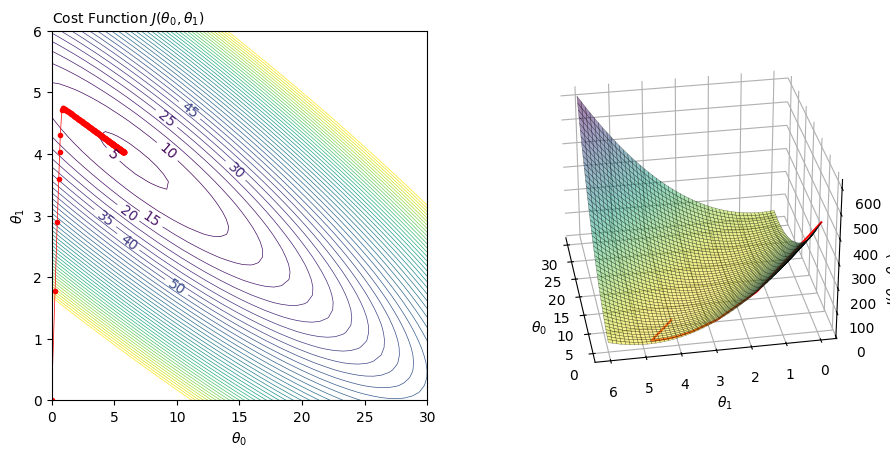

In [ ]:
# Grid for 2D parameter space:
theta_0_grid = np.linspace(0, 30, 50)
theta_1_grid = np.linspace(0, 6, 50)

# Z values of costs for the surface:
meshed_theta_0, meshed_theta_1 = np.meshgrid(theta_0_grid, theta_1_grid)
meshed_costs = np.zeros_like(meshed_theta_0)  # Costs array

for i in range(meshed_theta_0.shape[0]):
    for j in range(meshed_theta_0.shape[1]):
        meshed_costs[i, j] = cost_function(
            [meshed_theta_0[i, j], meshed_theta_1[i, j]], x, y
        )

# Gradient descent: 5 first params then every 10 epochs
intermediary_theta_0_vals = np.concatenate(
    (theta_0_grad_history[0:5], theta_0_grad_history[5::5]), axis=None
)
intermediary_theta_1_vals = np.concatenate(
    (theta_1_grad_history[0:5], theta_1_grad_history[5::5]), axis=None
)

# Cost for selected intermediary weights (one per GD step)
intermediary_grad_cost_history = np.array(
    [
        cost_function([t0, t1], x, y)
        for t0, t1 in zip(intermediary_theta_0_vals, intermediary_theta_1_vals)
    ]
)

plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(figsize=plt.figaspect(0.45))  # 16,4

# ==========================
#     Contour plot
# ==========================
plt.rcParams.update(plt.rcParamsDefault)

# Custom cost levels, from 5, step of 5, 200
levs = range(5, 200, 5)

ax = fig.add_subplot(1, 2, 1)

# Contour of theta parameter space:
CS = ax.contour(meshed_theta_0, meshed_theta_1, meshed_costs, levs, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt="%d")

# Add the intermediary thetas from gradient descent:
ax.plot(intermediary_theta_0_vals, intermediary_theta_1_vals, marker=".", c="r", lw=0.5)
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.title("Cost Function $J(\\theta_0, \\theta_1)$", loc="left", fontsize=10)

# ==========================
#     3D plot
# ==========================
ax = fig.add_subplot(1, 2, 2, projection="3d")

# 3D surface of cost vs (theta  0, theta 1):
surf = ax.plot_surface(
    meshed_theta_0,
    meshed_theta_1,
    meshed_costs,
    cmap="viridis_r",
    linewidth=0.3,
    alpha=0.5,
    edgecolor="k",
)

# Path of intermediary thetas from gradient descent:
ax.plot(
    intermediary_theta_0_vals,
    intermediary_theta_1_vals,
    intermediary_grad_cost_history,
    c="r",
)

ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("$J(\\theta_0, \\theta_1)$", rotation=90)
ax.azim = 170
ax.elev = 30
ax.xaxis.set_rotate_label(False)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_rotate_label(False)
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

plt.show()

<a id="check1"></a>
# <p style="background-color: #1b907d; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">1.6  Let’s check with NumPy</p>

In [ ]:
slope, intercept = np.polyfit(x, y, deg=1)

In [ ]:
print("Manual Linear Regressor Parameters:")
print(f"Intercept: {theta_0:.3f}")
print(f"Slope: {theta_1:.3f}")

print("\nNumPy Polyfit Parameters:")
print(f"Intercept: {intercept:.3f}")
print(f"Slope: {slope:.3f}")


Manual Linear Regressor Parameters:
Theta_0 (Intercept): 5.784
Theta_1 (Slope): 4.025

NumPy Polyfit Parameters:
Intercept: 6.581
Slope: 3.906


**Interpretation:**

 * The learned parameters are **different**
 * It can  be because the hyperparameters, such as the number of training iterations and the learning rate, are not the same.



<a id="part2"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part II: Generalizing to n features with vectorized gradient descent</p>

<a id="general"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">class LinearRegressor</p>

<a id="part3"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">Part III: Let’s get classy with OOP</p>

<a id="class"></a>
# <p style="background-color: #FFA500; font-family:Avantgarde; color:#ffffff; font-size:150%; text-align:center; border-radius:200px 30px; overflow:hidden; padding:17px">class LinearRegressor</p>

In [ ]:

class LinearRegressor:
    """
    Linear regressor that handles multiple features using vectorized operations.
    Parameters are represented as a vector to enable efficient gradient descent.
    """

    def __init__(self):
        self.theta = None  # Parameter vector [theta_0, theta_1, ..., theta_n]
        self.cost_history = []

    def add_intercept(self, X):
        """
        Add a column of ones to the feature matrix for the intercept term.

        Args:
            X: Feature matrix of shape (m, n) where m = samples, n = features

        Returns:
            X with intercept column: shape (m, n+1)
        """
        m = X.shape[0]
        return np.column_stack([np.ones(m), X])

    def hypothesis(self, X, theta):
        """
        Compute predictions using vectorized operations.

        Args:
            X: Feature matrix with intercept column, shape (m, n+1)
            theta: Parameter vector, shape (n+1,)

        Returns:
            Predictions: shape (m,)
        """
        return X.dot(theta)

    def cost_function(self, X, y, theta):
        """
        Compute the mean squared error cost.

        Args:
            X: Feature matrix with intercept, shape (m, n+1)
            y: Target values, shape (m,)
            theta: Parameter vector, shape (n+1,)

        Returns:
            Cost (scalar)
        """
        m = len(y)
        predictions = self.hypothesis(X, theta)
        residuals = predictions - y
        cost = (1 / (2 * m)) * np.sum(residuals ** 2)
        return cost

    def compute_gradients(self, X, y, theta):
        """
        Compute gradients using vectorized operations.

        Args:
            X: Feature matrix with intercept, shape (m, n+1)
            y: Target values, shape (m,)
            theta: Parameter vector, shape (n+1,)

        Returns:
            Gradients: shape (n+1,)
        """
        m = len(y)
        predictions = self.hypothesis(X, theta)
        residuals = predictions - y
        # Vectorized gradient computation: X.T @ residuals
        gradients = (1 / m) * X.T.dot(residuals)
        return gradients

    def fit(self, X, y, learning_rate=0.01, max_iterations=1000, tolerance=1e-6, verbose=True):
        """
        Train the linear regressor using gradient descent.

        Args:
            X: Feature matrix, shape (m, n)
            y: Target values, shape (m,)
            learning_rate: Learning rate for gradient descent
            max_iterations: Maximum number of iterations
            tolerance: Convergence tolerance
            verbose: Whether to print progress
        """
        # Add intercept term
        X_with_intercept = self.add_intercept(X)

        # Initialize parameters
        n_features = X_with_intercept.shape[1]
        self.theta = np.random.normal(0, 0.01, n_features)

        # Print shapes for debugging
        if verbose:
            print(f"X shape: {X.shape}")
            print(f"X with intercept shape: {X_with_intercept.shape}")
            print(f"y shape: {y.shape}")
            print(f"theta shape: {self.theta.shape}")
            print("-" * 50)

        self.cost_history = []
        prev_cost = float('inf')

        for iteration in range(max_iterations):
            # Compute cost
            cost = self.cost_function(X_with_intercept, y, self.theta)
            self.cost_history.append(cost)

            # Compute gradients
            gradients = self.compute_gradients(X_with_intercept, y, self.theta)

            # Update parameters
            self.theta -= learning_rate * gradients

            # Check for convergence
            if abs(prev_cost - cost) < tolerance:
                if verbose:
                    print(f"Converged at iteration {iteration}")
                break

            prev_cost = cost

            # Print progress
            if verbose and (iteration % 100 == 0 or iteration < 10):
                print(f"Iteration {iteration}: Cost = {cost:.6f}")
                print(f"Parameters: {self.theta}")
                print(f"Gradients: {gradients}")
                print()

    def predict(self, X):
        """
        Make predictions on new data.

        Args:
            X: Feature matrix, shape (m, n)

        Returns:
            Predictions: shape (m,)
        """
        if self.theta is None:
            raise ValueError("Model must be trained before making predictions")

        X_with_intercept = self.add_intercept(X)
        return self.hypothesis(X_with_intercept, self.theta)

    def get_parameters(self):
        """
        Get the learned parameters.

        Returns:
            Dictionary with intercept and coefficients
        """
        if self.theta is None:
            return None

        return {
            'intercept': self.theta[0],
            'coefficients': self.theta[1:],
            'all_parameters': self.theta
        }



In [ ]:
# Example usage and testing
def test_single_feature():
    """Test with single feature (should match our previous implementation)"""
    print("=== SINGLE FEATURE TEST ===")

    # Generate synthetic data
    np.random.seed(42)
    X = np.random.randn(100, 1) * 2
    true_intercept, true_slope = 3, 2
    y = df

    # Train model
    model = LinearRegressor()
    model.fit(X, y, learning_rate=0.1, max_iterations=1000)

    # Get parameters
    params = model.get_parameters()
    print(f"True parameters: intercept={true_intercept}, slope={true_slope}")
    print(f"Learned parameters: intercept={params['intercept']:.3f}, slope={params['coefficients'][0]:.3f}")

    # Plot results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.6, label='Data')
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_plot)
    plt.plot(X_plot, y_pred, 'r-', label='Learned line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Single Feature Regression')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(model.cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.yscale('log')

    plt.tight_layout()
    plt.show()

In [ ]:

def test_multiple_features():
    """Test with multiple features"""
    print("\n=== MULTIPLE FEATURES TEST ===")

    # Generate synthetic data with 3 features
    np.random.seed(42)
    m, n = 200, 3
    X = np.random.randn(m, n)
    true_theta = np.array([1, 2, -1, 0.5])  # [intercept, coef1, coef2, coef3]

    # Create target variable
    X_with_intercept = np.column_stack([np.ones(m), X])
    y = X_with_intercept.dot(true_theta) + np.random.randn(m) * 0.1

    # Train model
    model = LinearRegressor()
    model.fit(X, y, learning_rate=0.1, max_iterations=1000)

    # Get parameters
    params = model.get_parameters()
    print(f"True parameters: {true_theta}")
    print(f"Learned parameters: {params['all_parameters']}")
    print(f"Parameter differences: {np.abs(true_theta - params['all_parameters'])}")

    # Test predictions
    y_pred = model.predict(X)
    mse = np.mean((y - y_pred) ** 2)
    r2 = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.6f}")

    # Plot results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(model.cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.yscale('log')

    plt.subplot(1, 3, 2)
    plt.scatter(y, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs True Values')

    plt.subplot(1, 3, 3)
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()


In [ ]:

def demonstrate_vectorization_benefits():
    """Show the computational benefits of vectorization"""
    print("\n=== VECTORIZATION DEMONSTRATION ===")

    # Compare vectorized vs non-vectorized gradient computation
    np.random.seed(42)
    m, n = 1000, 10
    X = np.random.randn(m, n)
    X_with_intercept = np.column_stack([np.ones(m), X])
    y = np.random.randn(m)
    theta = np.random.randn(n + 1)

    # Vectorized version
    import time

    start = time.time()
    for _ in range(100):
        predictions = X_with_intercept.dot(theta)
        residuals = predictions - y
        gradients = (1/m) * X_with_intercept.T.dot(residuals)
    vectorized_time = time.time() - start

    # Non-vectorized version (for comparison)
    start = time.time()
    for _ in range(100):
        predictions = np.zeros(m)
        for i in range(m):
            predictions[i] = np.sum(X_with_intercept[i] * theta)
        residuals = predictions - y
        gradients = np.zeros(n + 1)
        for j in range(n + 1):
            gradients[j] = (1/m) * np.sum(residuals * X_with_intercept[:, j])
    loop_time = time.time() - start

    print(f"Vectorized computation time: {vectorized_time:.4f} seconds")
    print(f"Loop-based computation time: {loop_time:.4f} seconds")
    print(f"Speedup: {loop_time / vectorized_time:.1f}x faster")



=== SINGLE FEATURE TEST ===
X shape: (100, 1)
X with intercept shape: (100, 2)
y shape: (100,)
theta shape: (2,)
--------------------------------------------------
Iteration 0: Cost = 9.737597
Parameters: [0.26291318 0.59143463]
Gradients: [-2.59335306 -5.85826782]

Iteration 1: Cost = 6.203044
Parameters: [0.50848217 0.98878435]
Gradients: [-2.4556899  -3.97349722]

Iteration 2: Cost = 4.292262
Parameters: [0.73774694 1.2597424 ]
Gradients: [-2.29264768 -2.70958049]

Iteration 3: Cost = 3.167314
Parameters: [0.94971284 1.445796  ]
Gradients: [-2.11965901 -1.86053599]

Iteration 4: Cost = 2.443409
Parameters: [1.14434635 1.57468265]
Gradients: [-1.94633514 -1.28886657]

Iteration 5: Cost = 1.939686
Parameters: [1.3221934  1.66496022]
Gradients: [-1.77847049 -0.90277563]

Iteration 6: Cost = 1.567855
Parameters: [1.48413075 1.72905666]
Gradients: [-1.61937346 -0.64096444]

Iteration 7: Cost = 1.282289
Parameters: [1.6312056  1.77530547]
Gradients: [-1.4707485  -0.46248813]

Iteration 8:

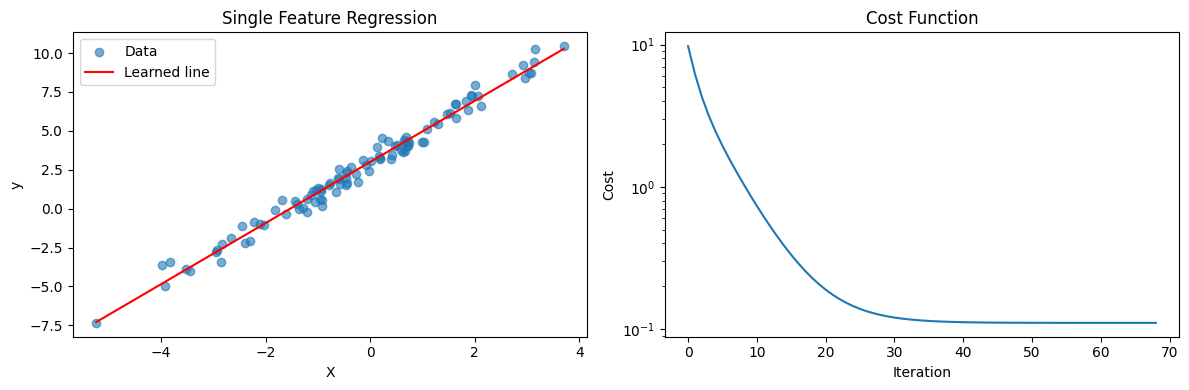

In [ ]:
test_single_feature()


=== MULTIPLE FEATURES TEST ===
X shape: (200, 3)
X with intercept shape: (200, 4)
y shape: (200,)
theta shape: (4,)
--------------------------------------------------
Iteration 0: Cost = 2.971591
Parameters: [ 0.1379781   0.15614215 -0.11461947  0.04958605]
Gradients: [-1.28595267 -1.61302599  1.15580682 -0.54208806]

Iteration 1: Cost = 2.413453
Parameters: [ 0.25077051  0.3042903  -0.21642499  0.09767292]
Gradients: [-1.12792409 -1.48148153  1.01805511 -0.48086868]

Iteration 2: Cost = 1.964234
Parameters: [ 0.34965174  0.44037203 -0.306115    0.14036496]
Gradients: [-0.98881225 -1.36081729  0.89690017 -0.42692036]

Iteration 3: Cost = 1.601987
Parameters: [ 0.43628992  0.56538395 -0.3851484   0.17830035]
Gradients: [-0.86638181 -1.25011913  0.79033394 -0.37935397]

Iteration 4: Cost = 1.309307
Parameters: [ 0.51215593  0.68023905 -0.45480755  0.21203942]
Gradients: [-0.75866006 -1.14855106  0.6965915  -0.33739062]

Iteration 5: Cost = 1.072370
Parameters: [ 0.57854654  0.78577389 -

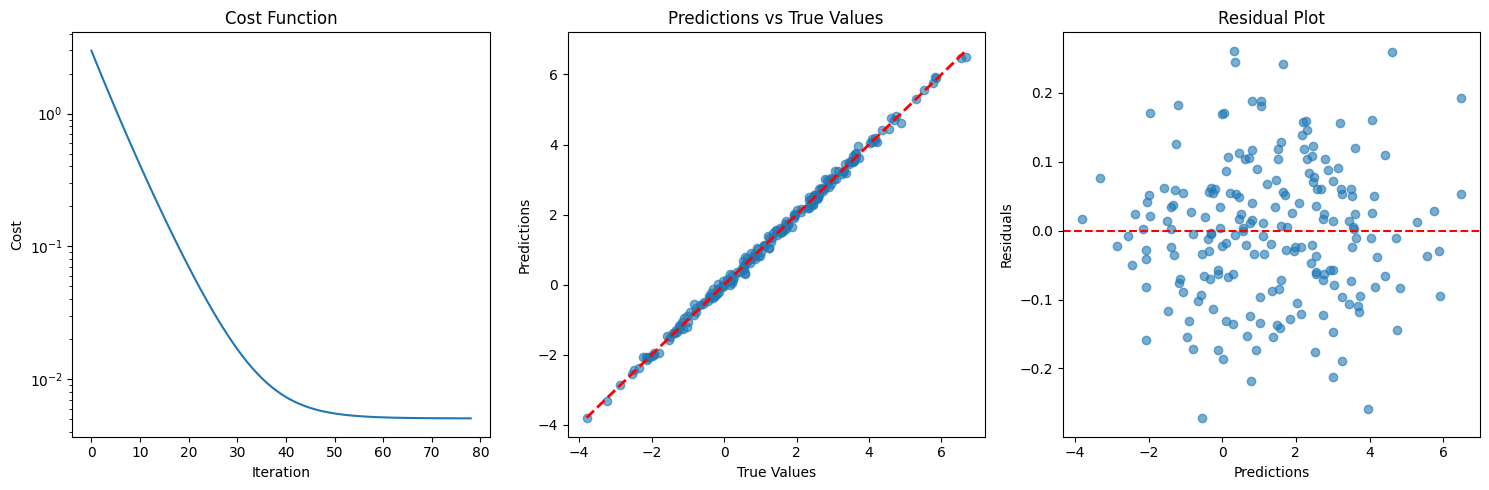

In [ ]:
test_multiple_features()

In [ ]:
demonstrate_vectorization_benefits()



=== VECTORIZATION DEMONSTRATION ===
Vectorized computation time: 0.0045 seconds
Loop-based computation time: 0.4975 seconds
Speedup: 110.7x faster
